# Basic Monte Carlo

In [10]:
%matplotlib inline
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('talk')

[seaborn](https://seaborn.pydata.org)

[example of seaborn](https://www.jianshu.com/p/4b925654f506)

## 1.Calculate the $\pi$ using monte carlo method

Area of the circle =  3.1404
pi =  3.141592653589793


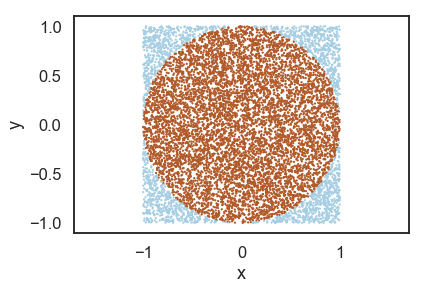

In [11]:
#area of the bounding box
box_area = 4.0    

#number of samples
N_total = 10000

#drawing random points uniform between -1 and 1
X = np.random.uniform(low=-1, high=1, size=N_total)  
Y = np.random.uniform(low=-1, high=1, size=N_total)   

# calculate the distance of the point from the center 
distance = np.sqrt(X**2+Y**2);  
 
# check if point is inside the circle    
is_point_inside = distance<1.0

# sum up the hits inside the circle
N_inside=np.sum(is_point_inside)

# estimate the circle area
circle_area = box_area * N_inside/N_total

# some nice visualization
plt.scatter(X,Y, c=is_point_inside, s=5.0, edgecolors='none', cmap=plt.cm.Paired)  
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')

# text output
print("Area of the circle = ", circle_area)
print("pi = ", np.pi)

## 2.General method of MC
Let $X\sim \phi$ and $\mathbb E[X] = \mu$ and $SD(X) = \sigma  > 0$, where $\mu$ and $\sigma$ are unknowns.
Our goal is to eistmiate $\mu$.

In crude MC, suppose computer can generate iid replicates $(X_i: i = 1, 2, ...)$, then we take the average of the first $N$ replicates as its estimate: $$\mu_N  = \frac 1 N \sum_{i=1}^N X_i \to \mu, \hbox{ as } N\to \infty.$$ The above convergence is guaranteed by LLN. In other words, if we set the error as $$e_N = \mu_N - \mu,$$ we have $e_N \to 0$ as $N\to \infty$, which is the most desired property of the estimator.

Another desired property is $L^2$ convergence, i.e. $$Var(e_N) = \mathbb E e_N^2 \to 0, \hbox{ as } N\to \infty.$$ This property holds due to the following $L^2$ error estimation $$\mathbb E e_N^2 =  \sigma^2/N.$$ Indeed, by CLT, we also have $$e_N \Rightarrow \mathcal{N}(0, \sigma/\sqrt{N}).$$

**Desired properties of the estimator** $\mu_N$

* (unbiasedness) $\lim_N e_N = 0$

* (efficiency) $Var(e_N)$ as small as possible.

**Calculate the integral of general form
To calculate $I = \int_D f(x) dx$ for $D\subset \mathbb R^d$, we utilize the following identities: $$I = \frac{1}{|D|} \int_D f(x) \phi(x) dx =  \frac{1}{|D|} \mathbb E f(X),$$ where $|D|$ is the volume of $D$, $\phi (x) \equiv |D|^{-1}$, and $X\sim U(D)$ is the uniform distribuiton on $D$.**

Ex. Design a MC for the integral calculation, and prove its convergence.

Ex Calculate $ I= \int_{2}^{3} [x^2 + 4 \, x \,\sin(x)] \, dx. $ by MC. For testing, we can use the anti-derivative $ \frac{x^3}{3} + 4\sin(x) -4x\cos(x).$

To solve this using MC, we draw $N$ random numbers from 2 to 3 and then take the average of all the values $f(x)=x^2 + 4 \, x \,\sin(x)$ and normalized over the volume; in this case the volume is 1 (3-2=1).

In [12]:
# define f(x) for our integral
def f(x):
    return x**2 + 4*x*np.sin(x) 

# and the anti-derivative for testing
def anti_derivative_f(x): 
    return x**3/3.0+4.0*np.sin(x) - 4.0*x*np.cos(x)

In [13]:
#sage
#plot(f, xmin = -1., xmax = 4.)

In [14]:
# upper and lower limits:
a = 2;    
b = 3; 

# use N draws 
N= 10000

#1. N values uniformly drawn from a to b 
X = np.random.uniform(low=a, high=b, size=N) 

#2. Compute f(X)
Y = f(X)   
# and the average
f_average = np.sum(Y)/ N

#3. estimate value of integral
estimate = (b-a) * f_average;

#we compute the exact value for testing
exact_val = anti_derivative_f(b) - anti_derivative_f(a)

print("Monte Carlo estimate = ",estimate)
print("Exact value = ", exact_val)


Monte Carlo estimate =  11.814464709488758
Exact value =  11.811358925098283


## 3.Mutlidimensional example:
Calculate the integral $I=\int \int f(x, y) dx dy$

where $f(x,y) = x^2 +y^2$

over the region deﬁned by the condition $x^2 +y^2 ≤ 1$.

The steps are the same as above, but we need an additional check that the region condition is fulfilled by our random samples. In particular, we transform the problem into $I = \int_D f(x) dx$ with 

$$D = [-1, 1]^2, \quad f(x, y) = (x^2+y^2) \cdot I_{[0,1]} (x^2+ y^2).$$

In [15]:
#define our f(x,y)
f_circle = lambda x,y: x**2 + y**2

# use N draws 
N= 10000

#sample X and Y
X= np.random.uniform(low=-1, high=1, size=N) 
Y= np.random.uniform(low=-1, high=1, size=N) 

# calculate f(x) 
f_value = f_circle(X, Y)  

# reject all samples that do not satisfy our region condition
N = np.sum(f_value<1) 

f_average = np.sum(f_value[f_value<1]) / N

print("Monte Carlo estimate = ", np.pi*f_average)
print("Exact value", np.pi/2.0)

Monte Carlo estimate =  1.5698814292073526
Exact value 1.5707963267948966


In [16]:
#sage
#f_circle_sage (x, y) = x^2 + y^2
#plot3d(f_circle_sage, (x,-2,2), (y,-2,2))

## 4.Error estimate
How does the accuracy depend on the number of points(samples)? 

Let's try the same 1-D integral $ I= \int_{2}^{3} [x^2 + 4 \, x \,\sin(x)] \, dx $ as a function of the number of points.

example:

Let $X\sim U(2,3)$ and $Y = X^2 + 4Xsin(X)$. Find the variance of $Y$.

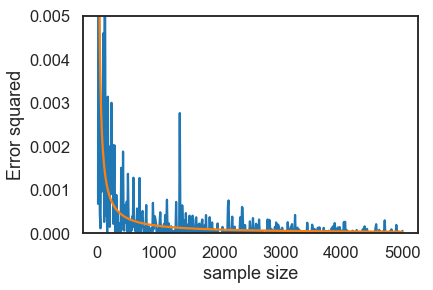

In [17]:
simN = 500 #simulation number
estimates = np.zeros(simN) 

# upper and lower limits:
a = 2;    
b = 3; 

exactval= anti_derivative_f(b)-anti_derivative_f(a)


for N in np.arange(simN):
    sampleN = 10*N + 10 #sample number
    X = np.random.uniform(low = a, high = b, size = sampleN)
    Y = f(X)
    estimates[N] = (b-a)*np.sum(Y)/sampleN;
errors_sq = np.square(estimates - exactval)
x_cd = 10*np.arange(simN)+10 #sample numbers

plt.plot(x_cd, errors_sq)
sigma_sq = 0.1702
plt.plot(x_cd, sigma_sq/x_cd)

plt.xlabel("sample size")
plt.ylabel("Error squared")
plt.ylim(0, 0.005);

**Our errors follow a normal distribution, and the variance of this distribution can be seen by plotting the histogram:**

Mean:  11.810739577298577
Variance:  0.00017221014828633257
Theoretical variance is: 0.0001702


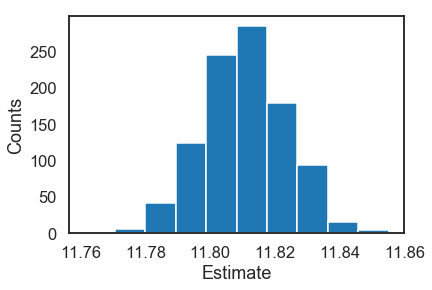

In [18]:
# multiple MC estimations
m=1000
N=1000

estimates = np.zeros(m)


for i in np.arange(0,m):    
    X = np.random.uniform(low=a, high=b, size=N) # N values uniformly drawn from a to b 
    Y =f(X)   # calculate f(x)

    estimates[i]= (b-a) * np.sum(Y)/ N;
    
    
plt.hist(estimates)
plt.xlabel("Estimate")
plt.ylabel("Counts")
print("Mean: ", np.mean(estimates))
print("Variance: ", np.var(estimates))
print("Theoretical variance is:", sigma_sq/N)